## Importing Necessary Libraries

In [79]:
import cv2
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import imutils
import webcolors
import time
import os

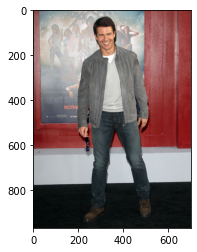

In [64]:
img = cv2.imread("examples/img_2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [65]:
img.shape

(967, 700, 3)

In [66]:
org_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
cv2.imshow("Original Image", org_img)
cv2.waitKey(0)

27

## Used KMeans Clustering to find the cluster of colors present in image

In [67]:
cluster = KMeans(n_clusters=5)     # n_clusters =  for 5 most dominant colors
cluster.fit(img.reshape(-1,3))

KMeans(n_clusters=5)

#### Cluster center represents the rgb values of dominant colors

In [68]:
cluster.cluster_centers_

array([[152.6529022 , 127.95860795, 126.59592536],
       [195.05240996, 195.71136411, 194.94297425],
       [ 18.80937681,  22.46296143,  23.18469702],
       [ 85.53004305,  88.71798839,  90.8913209 ],
       [142.29558306,  49.9737464 ,  49.0173932 ]])

#### Function for displaying dominant colors

In [70]:
def show_dominant_colors(arr):
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    steps = 300 / arr.shape[0]
    for idx, ele in enumerate(arr):
        color_deck[:, int(idx*steps):(int((idx+1)*steps)), :] = ele
    return color_deck

## No. of Color Occuring in the Images

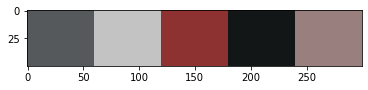

In [71]:
plt.imshow(show_dominant_colors(arr))

In [72]:
len(cluster.labels_)

676900

## Frequency / Percentage of color occuring in image

#### Function for Displaying proportion of colors in an image

In [86]:
def show_dominant_colors_frequency(arr, len_of_pixels, count):
    
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    no_of_pixels = len_of_pixels
    percentage = {}
    for i in count:
        percentage[i] = np.round((count[i] / no_of_pixels), 2)
    
    percentage = dict(sorted(percentage.items()))
    # print(percentage)
    
    steps = 0
    for idx, ele in enumerate(arr):
        color_deck[:, steps:int(steps+ percentage[idx]*300+1), :] = ele
        steps += int(percentage[idx]*300+1)
    
    return color_deck

#### Displays Colors and Imges

In [87]:
def get_Colors(img):
    
    
    t = time.time()
    # img = cv2.imread(img_path)
    fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    cluster = KMeans(n_clusters=5)
    cluster.fit(fix_img.reshape(-1,3))
    
    count = Counter(cluster.labels_)
    arr = cluster.cluster_centers_
    
    final_color_list = []
    for lst in arr:
        round_value = []
        for value in lst:
            round_value.append(round(value))
        final_color_list.append(get_colour_name(round_value))
    
    print("Color Names: ", final_color_list)
    
    
    len_of_pixels = len(cluster.labels_)
    f = plt.figure(figsize=(10,7))
    f.add_subplot(1,2, 1)
    plt.imshow(fix_img)
    f.add_subplot(1,2, 2)
    plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))
    plt.show(block=True)
    print("Time for Prediction : {:.3f}".format(time.time() - t))
    
    print('\n=======================================================================\n')
    #plt.imshow(fix_img)
    #plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))

### Function for displaying color names

In [77]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [78]:
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name

# requested_colour = (119, 172, 152)
# actual_name, closest_name = get_colour_name(requested_colour)

# print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

### Function to load Images from Dataset

In [80]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [81]:
images = load_images_from_folder('persons/')

## Predictions

['firebrick', 'black', 'lightgray', 'indianred', 'darkred']
{0: 0.32, 1: 0.3, 2: 0.01, 3: 0.2, 4: 0.17}


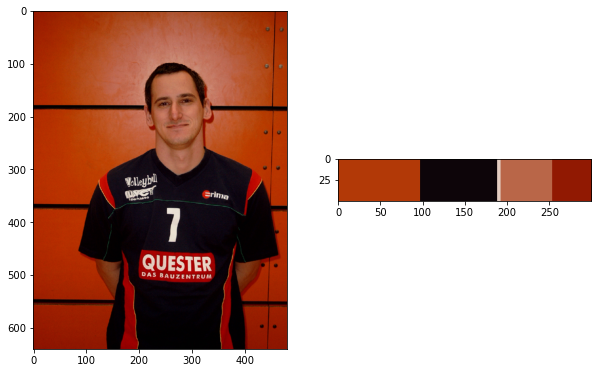

Time for Prediction : 4.397
['darkred', 'black', 'maroon', 'peru', 'maroon']
{0: 0.44, 1: 0.14, 2: 0.28, 3: 0.02, 4: 0.12}


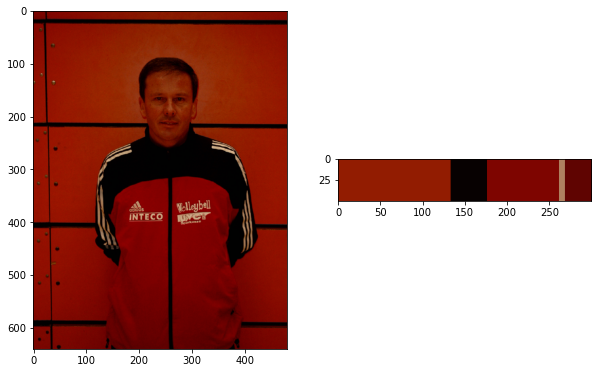

Time for Prediction : 5.932
['firebrick', 'black', 'lightpink', 'darkred', 'indianred']
{0: 0.28, 1: 0.31, 2: 0.04, 3: 0.14, 4: 0.23}


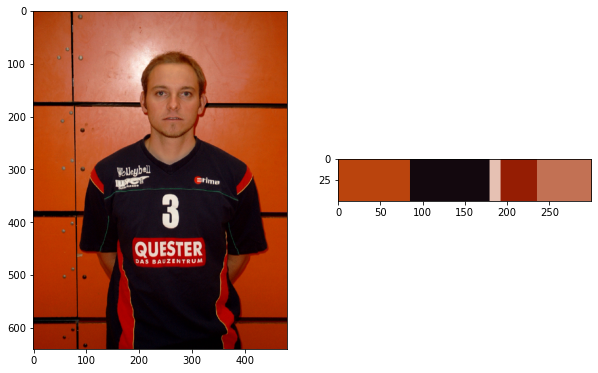

Time for Prediction : 6.098
['maroon', 'darkgray', 'silver', 'dimgray', 'black']
{0: 0.09, 1: 0.21, 2: 0.28, 3: 0.24, 4: 0.19}


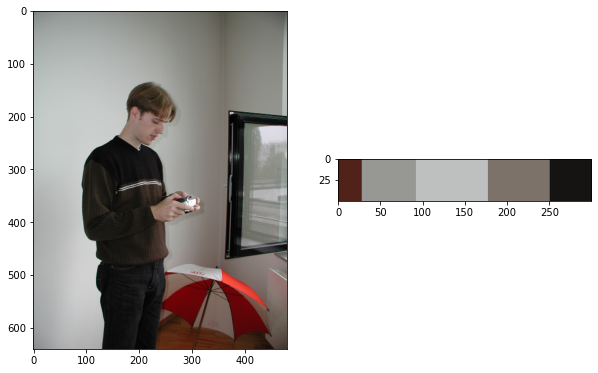

Time for Prediction : 5.643
['whitesmoke', 'gray', 'darkslategray', 'darkgray', 'dimgray']
{0: 0.09, 1: 0.32, 2: 0.17, 3: 0.12, 4: 0.3}


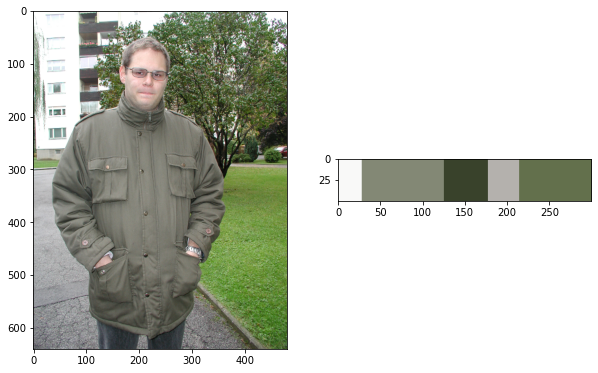

Time for Prediction : 7.383
['silver', 'darkolivegreen', 'darkgray', 'darkslategray', 'dimgray']
{0: 0.27, 1: 0.18, 2: 0.27, 3: 0.1, 4: 0.18}


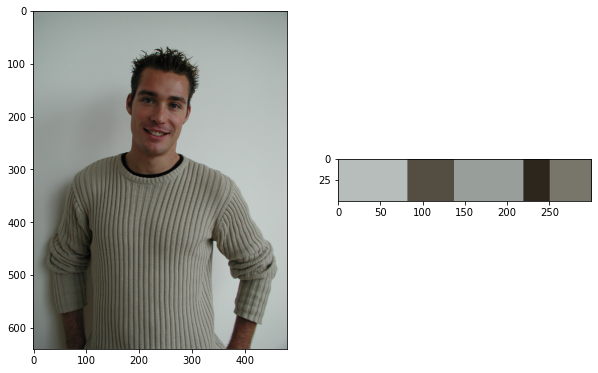

Time for Prediction : 7.600
['dimgray', 'darkslategray', 'black', 'gray', 'dimgray']
{0: 0.22, 1: 0.13, 2: 0.15, 3: 0.31, 4: 0.19}


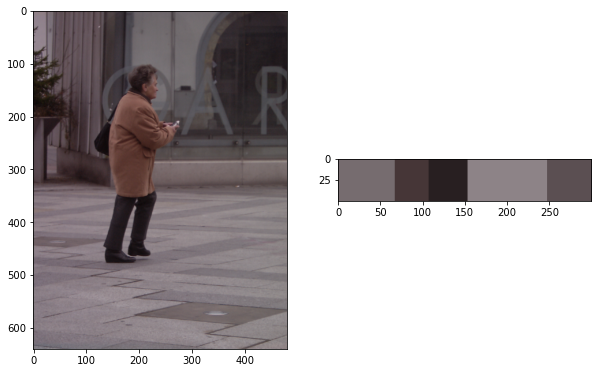

Time for Prediction : 7.664
['black', 'dimgray', 'dimgray', 'darkslategray', 'lightslategray']
{0: 0.1, 1: 0.43, 2: 0.19, 3: 0.16, 4: 0.12}


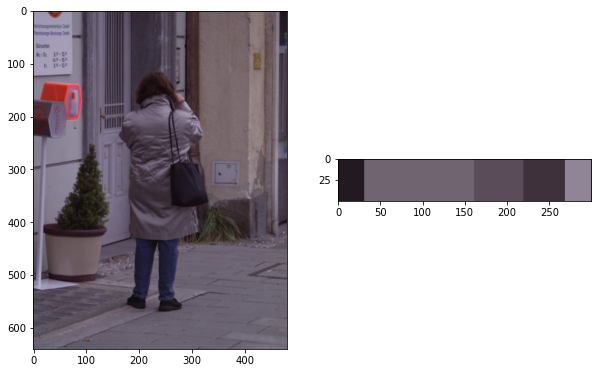

Time for Prediction : 6.432
['darkgray', 'black', 'lavender', 'darkslategray', 'dimgray']
{0: 0.19, 1: 0.34, 2: 0.14, 3: 0.16, 4: 0.17}


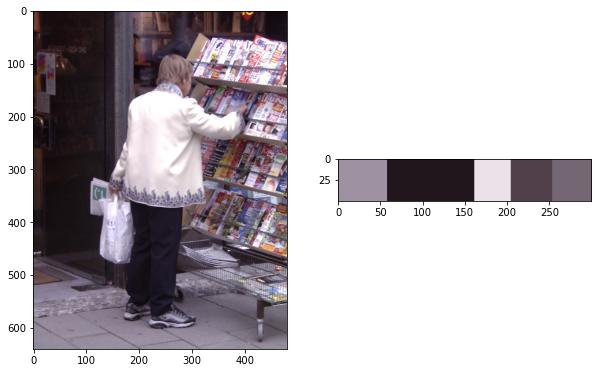

Time for Prediction : 5.707
['gray', 'black', 'darkgray', 'darkslategray', 'dimgray']
{0: 0.1, 1: 0.12, 2: 0.14, 3: 0.26, 4: 0.39}


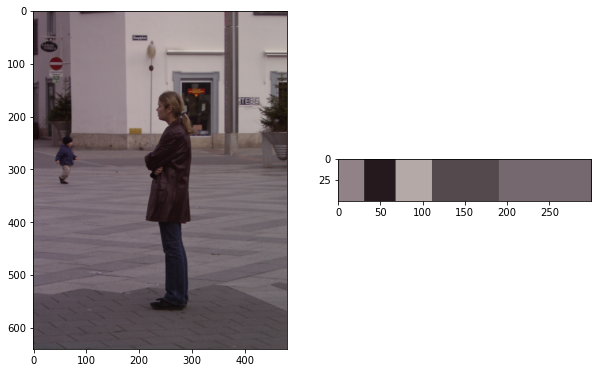

Time for Prediction : 5.692


In [82]:
for img in images[:10]:
    get_Colors(img)

In [84]:
# images = load_images_from_folder('PETA_dataset/VIPeR/archive/')

['dimgray', 'black', 'rosybrown', 'darkslategray', 'gray']
{0: 0.43, 1: 0.12, 2: 0.04, 3: 0.1, 4: 0.3}


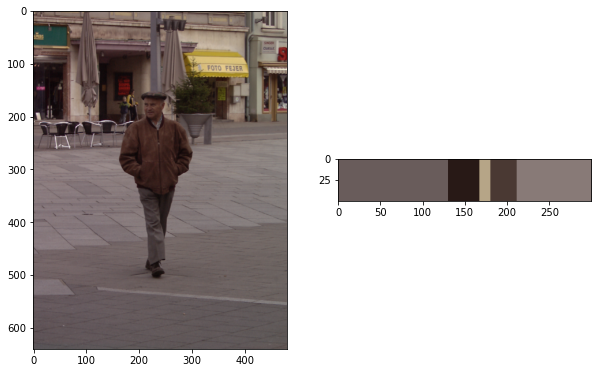

Time for Prediction : 6.175


['darkslategray', 'gray', 'black', 'dimgray', 'darkslategray']
{0: 0.18, 1: 0.2, 2: 0.12, 3: 0.34, 4: 0.15}


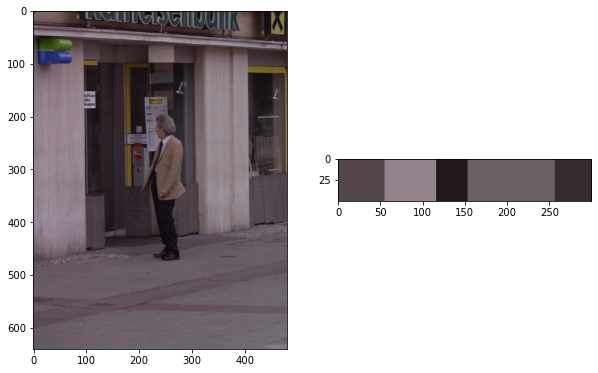

Time for Prediction : 8.067


['dimgray', 'darkslategray', 'dimgray', 'darkgray', 'black']
{0: 0.18, 1: 0.19, 2: 0.42, 3: 0.03, 4: 0.17}


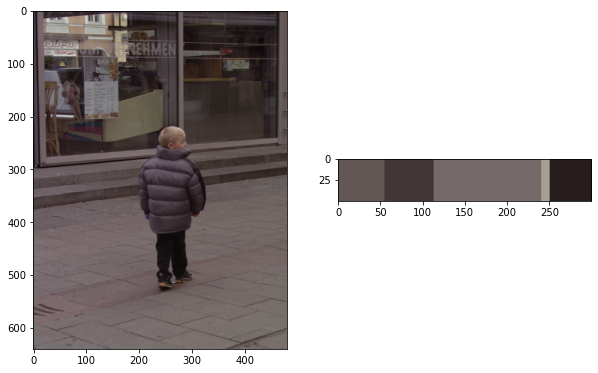

Time for Prediction : 7.270


['black', 'gray', 'darkolivegreen', 'dimgray', 'gray']
{0: 0.23, 1: 0.32, 2: 0.15, 3: 0.16, 4: 0.14}


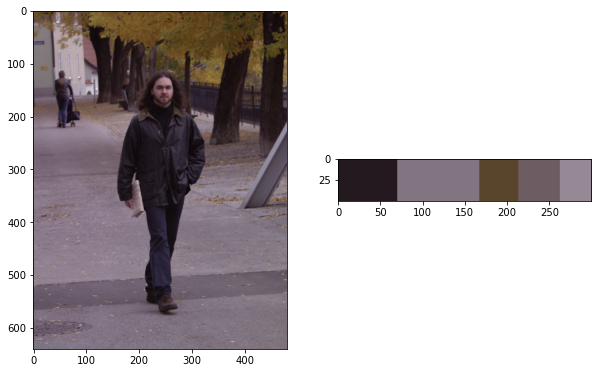

Time for Prediction : 6.471


['darkslategray', 'dimgray', 'black', 'gray', 'dimgray']
{0: 0.15, 1: 0.29, 2: 0.09, 3: 0.11, 4: 0.35}


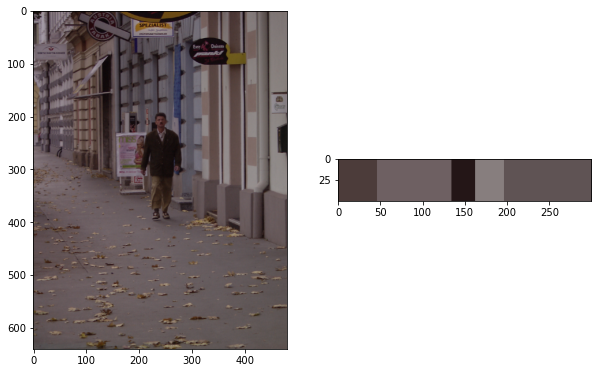

Time for Prediction : 7.621


['darkslategray', 'gainsboro', 'black', 'gray', 'dimgray']
{0: 0.32, 1: 0.04, 2: 0.37, 3: 0.09, 4: 0.18}


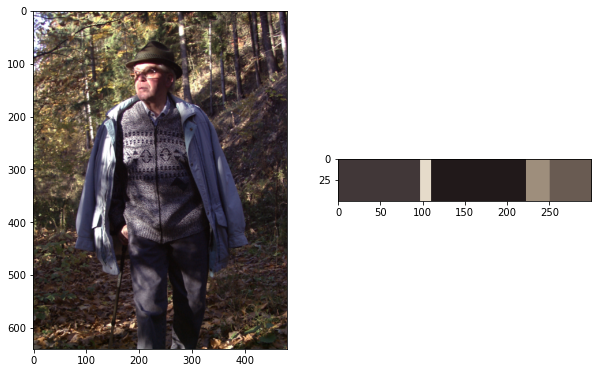

Time for Prediction : 10.916


['gray', 'darkslategray', 'gainsboro', 'darkslategray', 'darkgray']
{0: 0.21, 1: 0.2, 2: 0.13, 3: 0.19, 4: 0.27}


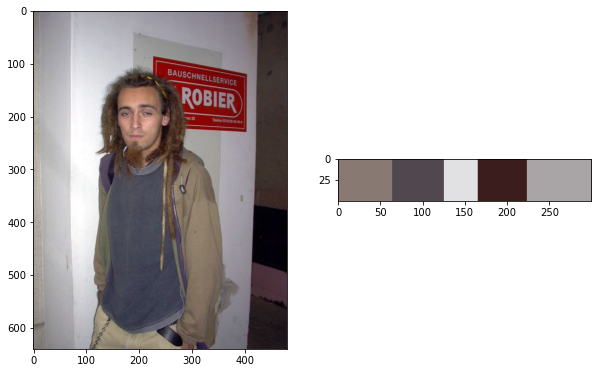

Time for Prediction : 7.151


['black', 'rosybrown', 'dimgray', 'whitesmoke', 'tan']
{0: 0.42, 1: 0.12, 2: 0.24, 3: 0.08, 4: 0.13}


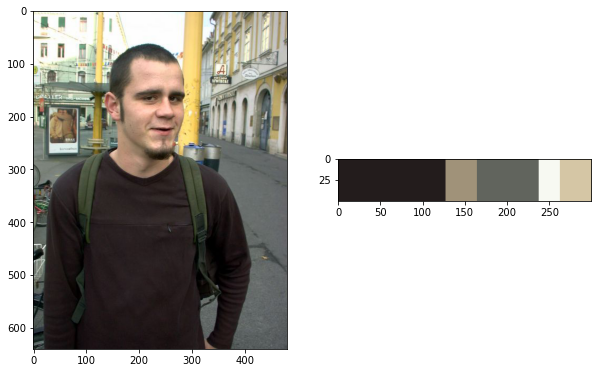

Time for Prediction : 5.836


['darkslategray', 'rosybrown', 'wheat', 'black', 'dimgray']
{0: 0.28, 1: 0.13, 2: 0.08, 3: 0.23, 4: 0.28}


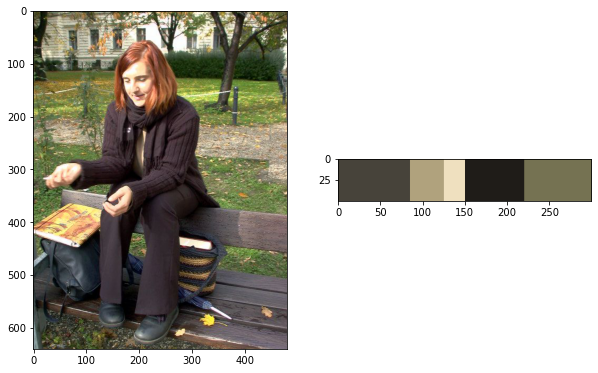

Time for Prediction : 7.486


['black', 'antiquewhite', 'darkslategray', 'rosybrown', 'dimgray']
{0: 0.22, 1: 0.17, 2: 0.29, 3: 0.11, 4: 0.21}


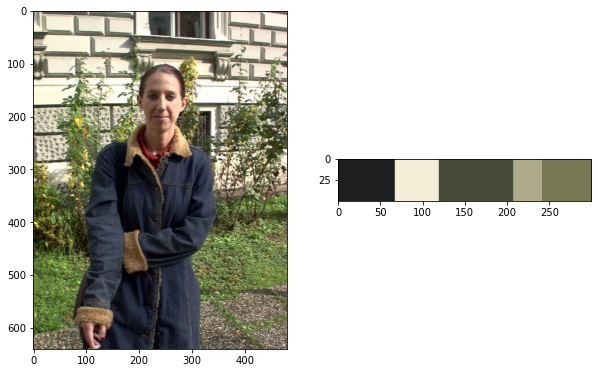

Time for Prediction : 8.437




In [85]:
for img in images[10:20]:
    get_Colors(img)

## Applying Model on High Resolution Images

In [88]:
images = load_images_from_folder('Kaggle_images/')

Color Names:  ['crimson', 'lavender', 'rosybrown', 'darkslategray', 'firebrick']


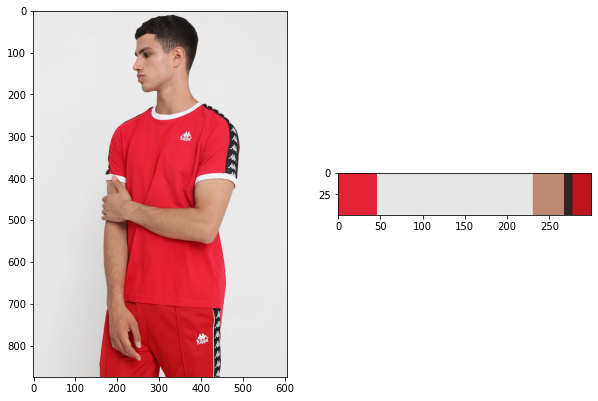

Time for Prediction : 6.258


Color Names:  ['gainsboro', 'teal', 'black', 'dimgray', 'tan']


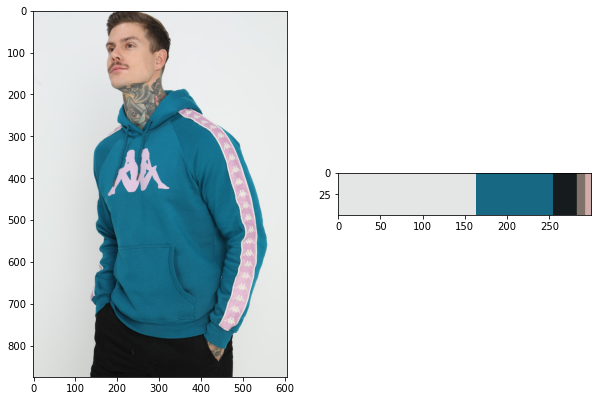

Time for Prediction : 8.587


Color Names:  ['lightgray', 'lightslategray', 'linen', 'dimgray', 'tan']


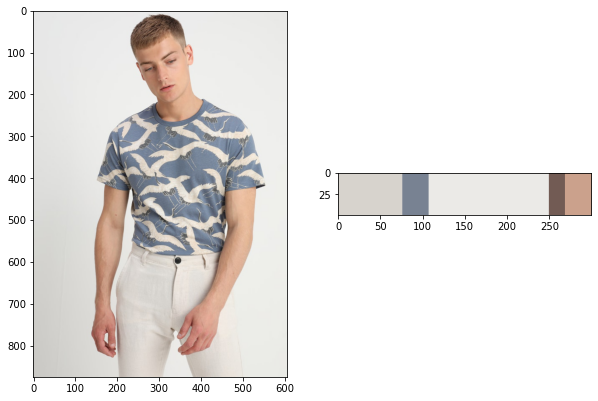

Time for Prediction : 11.956


Color Names:  ['lavender', 'black', 'lightseagreen', 'tan', 'dimgray']


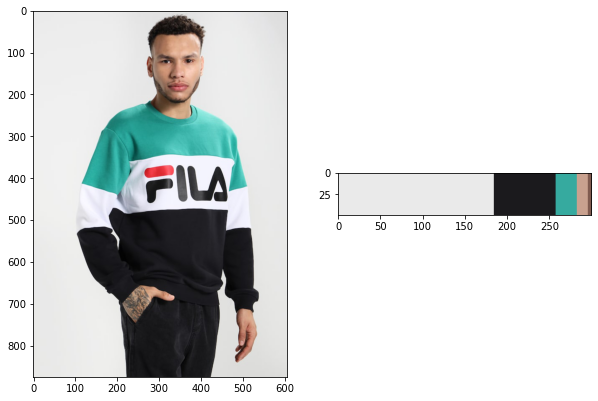

Time for Prediction : 8.362


Color Names:  ['crimson', 'whitesmoke', 'black', 'sienna', 'silver']


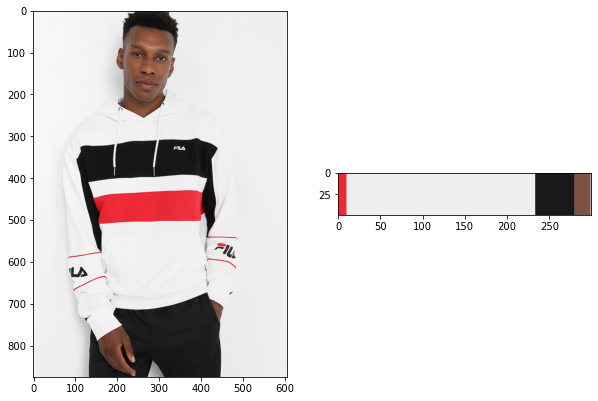

Time for Prediction : 10.999


Color Names:  ['dimgray', 'whitesmoke', 'dodgerblue', 'darkslategray', 'rosybrown']


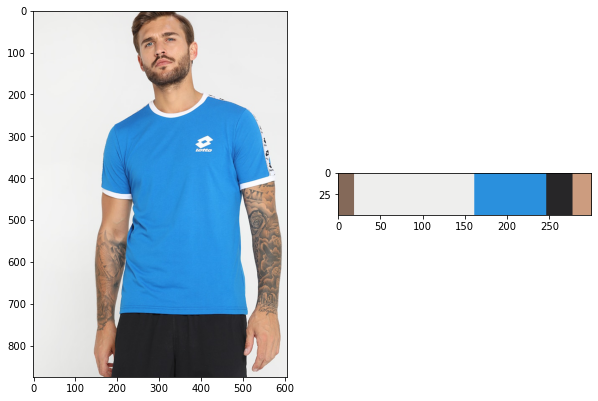

Time for Prediction : 5.786




In [89]:
for img in images[:]:
    get_Colors(img)